In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [3]:
import os
os.chdir('/content/drive/MyDrive/FBLA_Data_Analysis')

In [4]:
data = pd.read_csv('/content/drive/MyDrive/FBLA_Data_Analysis/FBLA_Electric_Vehicles_UK_Price_Per_Range.csv', header = None)

In [5]:
data

,0,1
0,Citroen e-C3,135
1,MG MG4 EV Long Range,131
2,Renault Scenic E-Tech 220hp Long Range,137
3,MG MG4 EV Extended Range,138
4,MG ZS EV Long Range,143
...,...,...
222,Porsche Taycan Turbo S,549
223,Porsche Taycan Turbo S Cross Turismo,585
224,Porsche Taycan Turbo S Sport Turismo,609
225,Maserati GranTurismo Folgore,755


In [6]:
data.columns = ['car', 'price_per_range']

In [7]:
data['price_per_range'] = round(data['price_per_range'] * 1.27).astype(int)

In [8]:
data

,car,price_per_range
0,Citroen e-C3,171
1,MG MG4 EV Long Range,166
2,Renault Scenic E-Tech 220hp Long Range,174
3,MG MG4 EV Extended Range,175
4,MG ZS EV Long Range,182
...,...,...
222,Porsche Taycan Turbo S,697
223,Porsche Taycan Turbo S Cross Turismo,743
224,Porsche Taycan Turbo S Sport Turismo,773
225,Maserati GranTurismo Folgore,959


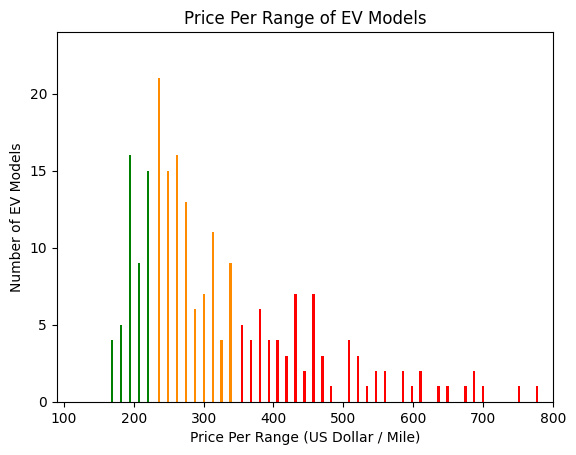

In [9]:
optimal_d = data['price_per_range'][data['price_per_range'] <= 229]
sub_optimal_d = data['price_per_range'][data['price_per_range'] > 230][data['price_per_range'] < 350]
non_optimal_d = data['price_per_range'][data['price_per_range'] > 350]


plt.hist([optimal_d, sub_optimal_d, non_optimal_d], color=['green', 'darkorange', 'red'], bins = 100)
plt.xlabel('Price Per Range (US Dollar / Mile)')
plt.ylabel('Number of EV Models')
plt.title('Price Per Range of EV Models')

ax = plt.gca()
ax.set_xlim(90, 800)
ax.set_ylim(0, 24)
plt.show()

In [10]:
data['price_per_range'].mean()

329.8942731277533

In [11]:
x = sorted(data['price_per_range'].unique())
y = data['price_per_range'].value_counts()

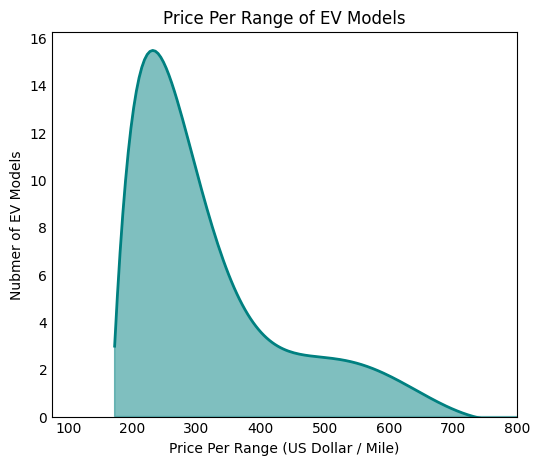

In [14]:
import numpy as np
import matplotlib.pyplot as plt

def plot_curve_fit(data, bins=30, degree=3, figsize=(6, 5)):
    fig, ax = plt.subplots(figsize=figsize)

    n, bins = np.histogram(data['price_per_range'].dropna(), bins=bins)

    x = (bins[:-1] + bins[1:]) / 2
    coeffs = np.polyfit(x, n, degree)
    poly = np.poly1d(coeffs)

    x_smooth = np.linspace(min(x), max(x), 300)
    y_smooth = poly(x_smooth)

    ax.fill_between(x_smooth, y_smooth, color='teal', alpha=0.5)

    ax.plot(x_smooth, y_smooth, color='teal', linewidth=2)

    ax.tick_params(axis='both', which='both', length=0)
    ax.grid(False)
    ax.set_xlim(left = 75, right = 800)
    ax.set_ylim(bottom = 0)

    plt.xlabel('Price Per Range (US Dollar / Mile)')
    plt.ylabel('Nubmer of EV Models')
    plt.title('Price Per Range of EV Models')

    plt.show()

plot_curve_fit(data, bins=100, degree=9)